# Imports, configs, etc

In [1]:
import numpy as np
import pandas as pd
import datetime
import pvlib

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


import os, sys
lib_path = os.path.abspath(os.path.join('..', 'rdtools'))
sys.path.append(lib_path)
import filtering

import pyart
import boto
import tempfile


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
s3conn = boto.connect_s3(aws_access_key_id=os.environ.get('AWSAccessKeyId'), 
                         aws_secret_access_key=os.environ.get('AWSSecretKey'))

bucket = s3conn.get_bucket('noaa-nexrad-level2')
s3key = bucket.get_key('2015/05/15/KVWX/KVWX20150515_080737_V06.gz')

In [3]:
# s3key = bucket.get_key('2016/07/04/KABX/KABX20160702_100000_V06.gz')
for key in bucket.list(prefix='2016/07/01/KABX/'):
    print(key)

<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_000147_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_000616_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_001044_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_001514_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_001943_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_002424_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_002906_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_003347_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_003841_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_004324_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_004819_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_005307_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_005809_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_010303_V06>
<Key: noaa-nexrad-level2,2016/07/01/KABX/KABX20160701_010812_V06>
<Key: noaa

In [4]:
s3key = bucket.get_key('2016/07/01/KABX/KABX20160701_014807_V06')

In [5]:
localfile = tempfile.NamedTemporaryFile()
s3key.get_contents_to_filename(localfile.name)
radar = pyart.io.read_nexrad_archive(localfile.name)

In [6]:
# radar.info()

In [7]:
# dates = pd.date_range(start='2016-07-04 10:00:00', end='2016-07-04 10:05:00', freq='10min')
# files = ['2016/07/04/KABX/KABX' + 
#          str(i.date()).replace('-', '') + '_' + 
#          str(i.time()).replace(':', '') + '.gz' for i in dates]
# radars = []
# for f in files:
#     print(f)
#     s3key = bucket.get_key(f)
#     localfile = tempfile.NamedTemporaryFile()
#     s3key.get_contents_to_filename(localfile.name)
#     radars.append(pyart.io.read_nexrad_archive(localfile.name))

In [8]:
grid = pyart.map.grid_from_radars(radar, fields=['reflectivity'],
                                 grid_shape=(50, 250, 250),
                                 grid_limits=((0, 15000.0),(-500000, 500000), (-500000, 500000)))

In [9]:
for key in grid.fields:
    print(key)

ROI
reflectivity


In [10]:
refl = grid.fields['reflectivity']

In [11]:
grid.nz, grid.ny, grid.nx

(50, 250, 250)

In [12]:
for lat, lon, alt, in zip(grid.point_latitude['data'].ravel(), 
                          grid.point_longitude['data'].ravel(), 
                          grid.point_altitude['data'].ravel()):
    pass

In [13]:
refl['data'].filled(np.nan)

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ..., 
       [[ nan,  nan, 

<IPython.core.display.Javascript object>


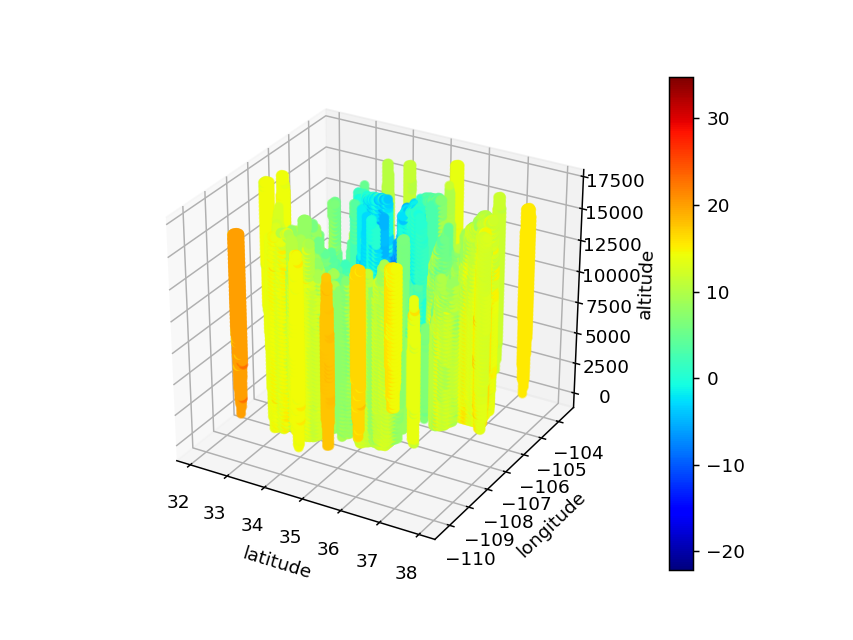

In [14]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D


z, y, x = grid.point_altitude['data'].ravel(), grid.point_longitude['data'].ravel(), grid.point_latitude['data'].ravel()
cm = grid.fields['reflectivity']['data'].ravel()
# z, y, x = np.ma.getdata(refl['data']).nonzero()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set
p = ax.scatter(x, y, z, c=cm, cmap=matplotlib.cm.jet)
_ = ax.scatter(35.0549, -106.5433, 0, c='black', marker='s')
fig.colorbar(p)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('altitude')
plt.show()

In [15]:
df = pd.DataFrame()
alt, long, lat = grid.point_altitude['data'].ravel(), grid.point_longitude['data'].ravel(), grid.point_latitude['data'].ravel()
refl = grid.fields['reflectivity']['data'].ravel()

df['lat'] = lat
df['lon'] = long
df['alt'] = alt
df['refl'] = refl

In [16]:
df.head()

,lat,lon,alt,refl
0,30.539660,-112.041246,1813.0,0.0
1,30.541474,-111.999407,1813.0,0.0
2,30.543272,-111.957566,1813.0,0.0
3,30.545056,-111.915724,1813.0,0.0
4,30.546826,-111.873880,1813.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125000 entries, 0 to 3124999
Data columns (total 4 columns):
lat     float64
lon     float64
alt     float64
refl    float32
dtypes: float32(1), float64(3)
memory usage: 83.4 MB


In [18]:
tmp = df[(df['lat'] > 35) & (df['lat'] < 36) & 
         (df['lon'] > -107) & (df['lon'] < -106)]

In [19]:
for unique_lat, group in tmp.groupby('lat'):
    print(group.head())
    print(group.tail())
    print('----' * 10)

              lat         lon          alt      refl
30393   35.020576 -106.007991  1813.000000  1.762793
92893   35.020576 -106.007991  2119.122449  2.664341
155393  35.020576 -106.007991  2425.244898  3.388724
217893  35.020576 -106.007991  2731.367347  3.681743
280393  35.020576 -106.007991  3037.489796  3.841122
               lat         lon           alt  refl
2842893  35.020576 -106.007991  15588.510204   0.0
2905393  35.020576 -106.007991  15894.632653   0.0
2967893  35.020576 -106.007991  16200.755102   0.0
3030393  35.020576 -106.007991  16506.877551   0.0
3092893  35.020576 -106.007991  16813.000000   0.0
----------------------------------------
              lat         lon          alt      refl
30392   35.020864 -106.052092  1813.000000  1.031433
92892   35.020864 -106.052092  2119.122449  1.582440
155392  35.020864 -106.052092  2425.244898  1.876945
217892  35.020864 -106.052092  2731.367347  2.420220
280392  35.020864 -106.052092  3037.489796  2.706686
               la

In [20]:
alts = df[(df['alt'] == 1813)]

In [21]:
alts.head()

,lat,lon,alt,refl
0,30.539660,-112.041246,1813.0,0.0
1,30.541474,-111.999407,1813.0,0.0
2,30.543272,-111.957566,1813.0,0.0
3,30.545056,-111.915724,1813.0,0.0
4,30.546826,-111.873880,1813.0,0.0


<IPython.core.display.Javascript object>


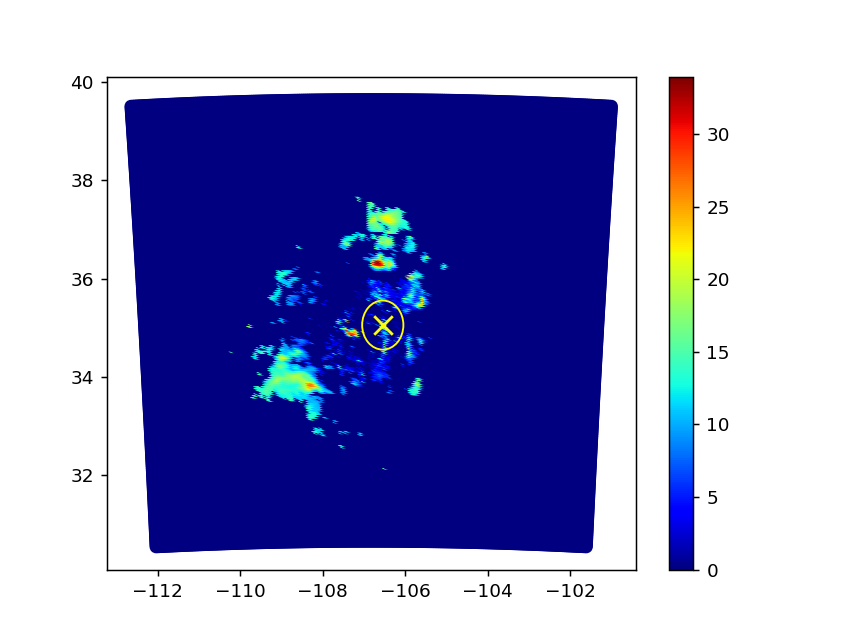

In [22]:
fig, ax = plt.subplots()
p = ax.scatter(alts['lon'].values, alts['lat'].values, c=alts['refl'].values, cmap=matplotlib.cm.jet, vmin=0)
ax.scatter( -106.5433, 35.0549, marker='x', c='yellow', s=100)
circle = plt.Circle((-106.5433, 35.0549), .5, color='yellow', fill=None)
ax.add_artist(circle)
fig.colorbar(p)

In [23]:
vals = grid.get_point_longitude_latitude(level=5)

In [24]:
len(vals)

2

In [25]:
a, b = vals[0][0][0], vals[1][0][0]

In [26]:
print(a, b)

-112.041246058 30.5396604162


In [27]:
print(type(vals))

<class 'tuple'>


In [28]:
for i in vals:
    print(type(i))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


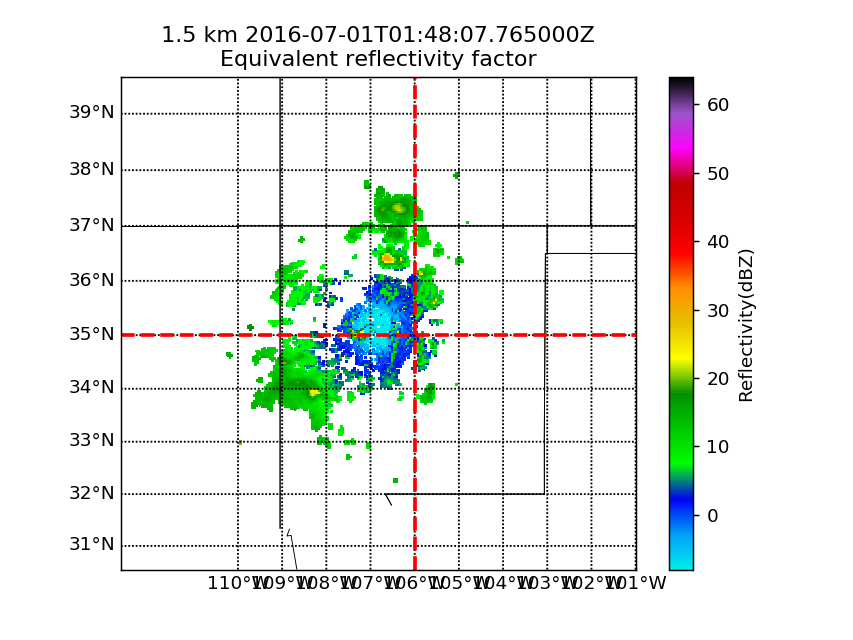

/Users/benellis/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/benellis/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [29]:
display = pyart.graph.GridMapDisplay(grid)
fig = plt.figure()

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 5
vmin = -8
vmax = 64
lat = 35
lon = -106

# panel 1, basemap, radar reflectivity and NARR overlay
# ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap()#lon_lines=np.arange)#(-110, -104, 1))
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(lon=lon, lat=lat)
# display.plot_crosshairs(lon=a, lat=b)

In [30]:
vals = radar.get_field(0, 'reflectivity')

In [31]:
vals.shape

(720, 1832)

In [32]:
import numpy as np
import pyart
import pyproj


def find_x_y_displacement(radar, longitude, latitude):
    """ Return the x and y displacement (in meters) from a radar location. """
    # longitude and latitude in degrees
    lat_0 = radar.latitude['data'][0]
    lon_0 = radar.longitude['data'][0]
    proj = pyproj.Proj(proj='aeqd', lon_0=lon_0, lat_0=lat_0)
    return proj(longitude, latitude)


def find_nearest_gate(radar, longitude, latitude, altitude):
    """ Return the indices of the nearest gate to a given point. """
    # longitude and latitude in degrees, altitude in meters
    gate_x = radar.gate_x['data']
    gate_y = radar.gate_y['data']
    gate_z = radar.gate_z['data']

    x_disp, y_disp = find_x_y_displacement(radar, longitude, latitude)
    distances = np.sqrt(
        (gate_x-x_disp)**2. + (gate_y-y_disp)**2. + (gate_z-altitude)**2.)
    return np.unravel_index(distances.argmin(), distances.shape)


def interpolate_single_point(radar, longitude, latitude, altitude):
    """ Interpolate a single grid point at a given location. """
    x_disp, y_disp = find_x_y_displacement(radar, longitude, latitude)
    grid = pyart.map.grid_from_radars(
        (radar,),
        gridding_algo='map_gates_to_grid',
        grid_shape=(1, 1, 1),
        grid_limits=((altitude, 0), (y_disp, 25000.0), (x_disp, 25000.0)),
        fields=['reflectivity'])
    return grid


# read in the file
# filename = 'RADAR_FILE'
# radar = pyart.io.read(filename)

latitude = 34.1    # latitude (in degrees) to find reflectivity at or near
longitude = -108.9  # longitude (in degrees) to find reflectivity at or near
altitude = 330       # altitude (in meters) to find reflectivity at or near

# find nearest gate
ray, gate = find_nearest_gate(radar, longitude, latitude, altitude)
gate_latitude = radar.gate_latitude['data'][ray, gate]
gate_longitude = radar.gate_longitude['data'][ray, gate]
gate_altitude = radar.gate_altitude['data'][ray, gate]
gate_reflectivity = radar.fields['reflectivity']['data'][ray, gate]
print("-----------------------")
print("Nearest gate:")
print("Latitude:", gate_latitude)
print("Longitude:", gate_longitude)
print("Altitude:", gate_altitude)
print("Reflectivity:", gate_reflectivity)

# interpolate around gate
grid = interpolate_single_point(radar, longitude, latitude, altitude)
# pyart.io.add_2d_latlon_axis(grid)
# pixel_latitude = grid.axes['latitude']['data'][0, 0]
# pixel_longitude = grid.axes['longitude']['data'][0, 0]
# pixel_altitude = grid.axes['z_disp']['data'][0]
# pixel_reflectivity = grid.fields['reflectivity']['data'][0, 0]#

# print("-----------------------")
# print("Interpolated pixel:")
# print("Latitude:", pixel_latitude)
# print("Longitude:", pixel_longitude)
# print("Altitude:", pixel_altitude)
# print("Reflectivity:", pixel_reflectivity)

-----------------------
Nearest gate:
Latitude: 34.1058321757
Longitude: -108.905328049
Altitude: 6389.27843466
Reflectivity: --
